# mnist dataset

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

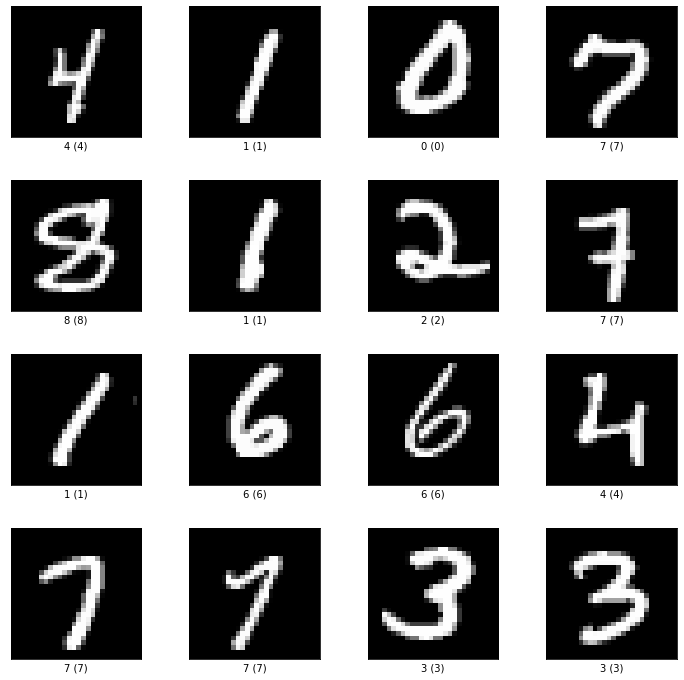

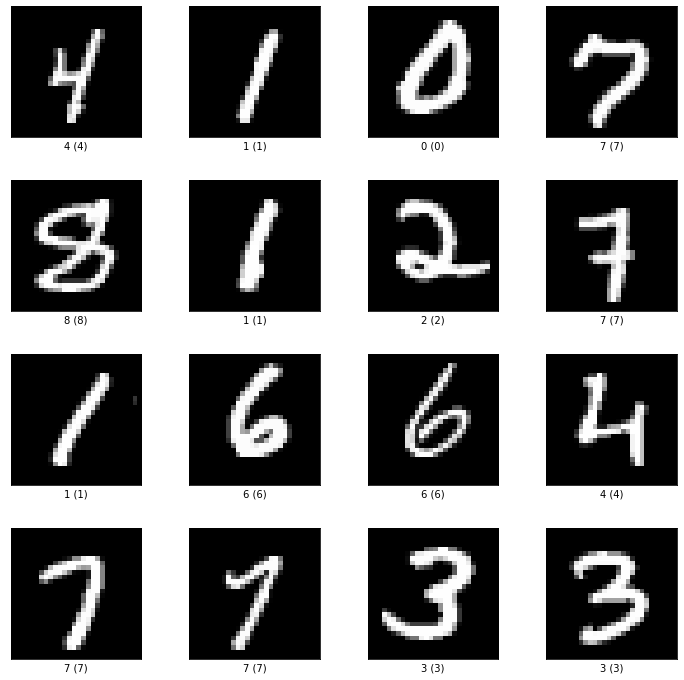

In [3]:
# dataset examples
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=False,  # will return dict otherwise tuple (img, label) 
    with_info=True,  # able to get info about dataset
)
fig= tfds.show_examples(ds_train, ds_info, rows=4, cols=4)
fig

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)

In [5]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Abdullah\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [6]:
# Normalizes images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

In [7]:
# Setup for train dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache() # cache keep track of data in memory
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

# Setup for test Dataset
ds_test = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_train.batch(128)
ds_test = ds_train.prefetch(AUTOTUNE)

In [8]:
model= keras.Sequential([
    keras.Input((28,28,1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(10)
])

In [11]:
model.compile(optimizer= keras.optimizers.Adam(),
             loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [12]:
model.fit(ds_train, epochs=5, verbose=2)

Epoch 1/5
469/469 - 23s - loss: 0.2606 - accuracy: 0.9262
Epoch 2/5
469/469 - 22s - loss: 0.0976 - accuracy: 0.9729
Epoch 3/5
469/469 - 22s - loss: 0.0662 - accuracy: 0.9814
Epoch 4/5
469/469 - 22s - loss: 0.0512 - accuracy: 0.9855
Epoch 5/5
469/469 - 22s - loss: 0.0423 - accuracy: 0.9877


In [13]:
model.evaluate(ds_test)

469/469 [==============================] - ETA: 3:30 - loss: 0.0625 - accuracy: 0.98 - ETA: 10s - loss: 0.0487 - accuracy: 0.9883 - ETA: 10s - loss: 0.0417 - accuracy: 0.987 - ETA: 10s - loss: 0.0376 - accuracy: 0.990 - ETA: 10s - loss: 0.0399 - accuracy: 0.988 - ETA: 10s - loss: 0.0421 - accuracy: 0.987 - ETA: 10s - loss: 0.0424 - accuracy: 0.987 - ETA: 10s - loss: 0.0419 - accuracy: 0.987 - ETA: 10s - loss: 0.0426 - accuracy: 0.987 - ETA: 10s - loss: 0.0424 - accuracy: 0.986 - ETA: 10s - loss: 0.0420 - accuracy: 0.986 - ETA: 10s - loss: 0.0398 - accuracy: 0.987 - ETA: 10s - loss: 0.0401 - accuracy: 0.988 - ETA: 10s - loss: 0.0397 - accuracy: 0.988 - ETA: 10s - loss: 0.0395 - accuracy: 0.988 - ETA: 9s - loss: 0.0386 - accuracy: 0.988 - ETA: 9s - loss: 0.0384 - accuracy: 0.98 - ETA: 9s - loss: 0.0376 - accuracy: 0.98 - ETA: 9s - loss: 0.0374 - accuracy: 0.98 - ETA: 9s - loss: 0.0370 - accuracy: 0.98 - ETA: 9s - loss: 0.0375 - accuracy: 0.98 - ETA: 9s - loss: 0.0371 - accuracy: 0.98 - E

[0.034925881773233414, 0.9904333353042603]

# imdb dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
(ds_train, ds_test), ds_info= tfds.load('imdb_reviews',
                                       split= ['train', 'test'], # it doesn't support validation
                                       shuffle_files=True,
                                       as_supervised=True,
                                       with_info=True)

In [3]:
ds_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\Abdullah\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'trai

In [4]:
# tokenizer convert sentence to small pieces of string
tokenizer = tfds.deprecated.text.Tokenizer()

In [5]:
def build_vocabulary():
    vocabulary = set()
    for text, _ in ds_train:
        vocabulary.update(tokenizer.tokenize(text.numpy().lower()))
    return vocabulary

In [6]:
vocabulary= build_vocabulary()

In [7]:
# encoder convert strings to integer
encoder = tfds.deprecated.text.TokenTextEncoder(
    list(vocabulary), oov_token="<UNK>", lowercase=True, tokenizer=tokenizer)

In [8]:
# tokenize sentence and convert it to index based on vocabulary
def my_enc(text_tensor, label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label

In [10]:
def encode_map_fn(text, label):
    # py_func doesn't set the shape of the returned tensors.
    encoded_text, label = tf.py_function(
        my_enc, inp=[text, label], Tout=(tf.int64, tf.int64))
    # `tf.data.Datasets` work best if all components have a shape set
    #  so set the shapes manually:
    encoded_text.set_shape([None])
    label.set_shape([])

    return encoded_text, label

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(encode_map_fn, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.padded_batch(32, padded_shapes=([None], ()))
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(encode_map_fn)
ds_test = ds_test.padded_batch(32, padded_shapes=([None], ()))

In [12]:
model = keras.Sequential([
        layers.Masking(mask_value=0),
        layers.Embedding(input_dim=len(vocabulary) + 2, output_dim=32),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ])

In [13]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(3e-4, clipnorm=1),
    metrics=["accuracy"],
)

In [14]:
model.fit(ds_train, epochs=15, verbose=2)

Epoch 1/15
782/782 - 82s - loss: 0.6762 - accuracy: 0.5035
Epoch 2/15
782/782 - 70s - loss: 0.4955 - accuracy: 0.7200
Epoch 3/15
782/782 - 70s - loss: 0.3392 - accuracy: 0.8591
Epoch 4/15
782/782 - 70s - loss: 0.2691 - accuracy: 0.8936
Epoch 5/15
782/782 - 70s - loss: 0.2285 - accuracy: 0.9117
Epoch 6/15
782/782 - 70s - loss: 0.1979 - accuracy: 0.9258
Epoch 7/15
782/782 - 70s - loss: 0.1756 - accuracy: 0.9359
Epoch 8/15
782/782 - 70s - loss: 0.1549 - accuracy: 0.9451
Epoch 9/15
782/782 - 70s - loss: 0.1362 - accuracy: 0.9534
Epoch 10/15
782/782 - 70s - loss: 0.1214 - accuracy: 0.9593
Epoch 11/15
782/782 - 69s - loss: 0.1073 - accuracy: 0.9659
Epoch 12/15
782/782 - 69s - loss: 0.0946 - accuracy: 0.9689
Epoch 13/15
782/782 - 69s - loss: 0.0832 - accuracy: 0.9735
Epoch 14/15
782/782 - 70s - loss: 0.0727 - accuracy: 0.9780
Epoch 15/15
782/782 - 70s - loss: 0.0642 - accuracy: 0.9808


In [15]:
model.evaluate(ds_test)

252/782 [========>.....................] - ETA: 7:17 - loss: 0.6069 - accuracy: 0.84 - ETA: 33s - loss: 0.5785 - accuracy: 0.8229 - ETA: 29s - loss: 0.5708 - accuracy: 0.825 - ETA: 32s - loss: 0.5190 - accuracy: 0.843 - ETA: 33s - loss: 0.5513 - accuracy: 0.843 - ETA: 32s - loss: 0.4818 - accuracy: 0.864 - ETA: 33s - loss: 0.4711 - accuracy: 0.865 - ETA: 34s - loss: 0.4688 - accuracy: 0.866 - ETA: 33s - loss: 0.4725 - accuracy: 0.867 - ETA: 34s - loss: 0.4497 - accuracy: 0.872 - ETA: 35s - loss: 0.4267 - accuracy: 0.877 - ETA: 34s - loss: 0.4360 - accuracy: 0.867 - ETA: 35s - loss: 0.4319 - accuracy: 0.869 - ETA: 34s - loss: 0.4239 - accuracy: 0.862 - ETA: 34s - loss: 0.4054 - accuracy: 0.866 - ETA: 34s - loss: 0.4110 - accuracy: 0.865 - ETA: 34s - loss: 0.4119 - accuracy: 0.867 - ETA: 34s - loss: 0.4215 - accuracy: 0.865 - ETA: 34s - loss: 0.4075 - accuracy: 0.869 - ETA: 33s - loss: 0.4141 - accuracy: 0.867 - ETA: 33s - loss: 0.4149 - accuracy: 0.869 - ETA: 33s - loss: 0.4007 - accura

449/782 [================>.............] - ETA: 28s - loss: 0.3556 - accuracy: 0.878 - ETA: 28s - loss: 0.3547 - accuracy: 0.878 - ETA: 28s - loss: 0.3541 - accuracy: 0.878 - ETA: 28s - loss: 0.3533 - accuracy: 0.878 - ETA: 28s - loss: 0.3529 - accuracy: 0.878 - ETA: 28s - loss: 0.3522 - accuracy: 0.879 - ETA: 28s - loss: 0.3517 - accuracy: 0.879 - ETA: 28s - loss: 0.3526 - accuracy: 0.879 - ETA: 28s - loss: 0.3534 - accuracy: 0.878 - ETA: 28s - loss: 0.3526 - accuracy: 0.879 - ETA: 28s - loss: 0.3528 - accuracy: 0.879 - ETA: 28s - loss: 0.3524 - accuracy: 0.879 - ETA: 28s - loss: 0.3519 - accuracy: 0.879 - ETA: 28s - loss: 0.3509 - accuracy: 0.879 - ETA: 28s - loss: 0.3508 - accuracy: 0.879 - ETA: 28s - loss: 0.3512 - accuracy: 0.879 - ETA: 28s - loss: 0.3517 - accuracy: 0.879 - ETA: 28s - loss: 0.3506 - accuracy: 0.879 - ETA: 28s - loss: 0.3496 - accuracy: 0.879 - ETA: 28s - loss: 0.3488 - accuracy: 0.879 - ETA: 28s - loss: 0.3485 - accuracy: 0.880 - ETA: 28s - loss: 0.3499 - accurac

655/782 [========================>.....] - ETA: 21s - loss: 0.3512 - accuracy: 0.878 - ETA: 21s - loss: 0.3506 - accuracy: 0.878 - ETA: 20s - loss: 0.3506 - accuracy: 0.879 - ETA: 20s - loss: 0.3498 - accuracy: 0.879 - ETA: 20s - loss: 0.3497 - accuracy: 0.879 - ETA: 20s - loss: 0.3495 - accuracy: 0.879 - ETA: 20s - loss: 0.3491 - accuracy: 0.879 - ETA: 20s - loss: 0.3498 - accuracy: 0.879 - ETA: 20s - loss: 0.3489 - accuracy: 0.879 - ETA: 20s - loss: 0.3492 - accuracy: 0.879 - ETA: 20s - loss: 0.3495 - accuracy: 0.879 - ETA: 19s - loss: 0.3505 - accuracy: 0.879 - ETA: 19s - loss: 0.3511 - accuracy: 0.878 - ETA: 19s - loss: 0.3506 - accuracy: 0.879 - ETA: 19s - loss: 0.3509 - accuracy: 0.879 - ETA: 19s - loss: 0.3507 - accuracy: 0.879 - ETA: 19s - loss: 0.3506 - accuracy: 0.879 - ETA: 19s - loss: 0.3500 - accuracy: 0.879 - ETA: 19s - loss: 0.3495 - accuracy: 0.879 - ETA: 19s - loss: 0.3507 - accuracy: 0.879 - ETA: 19s - loss: 0.3505 - accuracy: 0.879 - ETA: 19s - loss: 0.3504 - accurac

782/782 [==============================] - ETA: 7s - loss: 0.3495 - accuracy: 0.88 - ETA: 7s - loss: 0.3492 - accuracy: 0.88 - ETA: 7s - loss: 0.3493 - accuracy: 0.88 - ETA: 7s - loss: 0.3492 - accuracy: 0.88 - ETA: 7s - loss: 0.3492 - accuracy: 0.88 - ETA: 7s - loss: 0.3488 - accuracy: 0.88 - ETA: 7s - loss: 0.3486 - accuracy: 0.88 - ETA: 7s - loss: 0.3485 - accuracy: 0.88 - ETA: 7s - loss: 0.3478 - accuracy: 0.88 - ETA: 7s - loss: 0.3479 - accuracy: 0.88 - ETA: 6s - loss: 0.3476 - accuracy: 0.88 - ETA: 6s - loss: 0.3474 - accuracy: 0.88 - ETA: 6s - loss: 0.3474 - accuracy: 0.88 - ETA: 6s - loss: 0.3473 - accuracy: 0.88 - ETA: 6s - loss: 0.3478 - accuracy: 0.88 - ETA: 6s - loss: 0.3477 - accuracy: 0.88 - ETA: 6s - loss: 0.3476 - accuracy: 0.88 - ETA: 6s - loss: 0.3474 - accuracy: 0.88 - ETA: 6s - loss: 0.3471 - accuracy: 0.88 - ETA: 6s - loss: 0.3474 - accuracy: 0.88 - ETA: 6s - loss: 0.3483 - accuracy: 0.88 - ETA: 6s - loss: 0.3479 - accuracy: 0.88 - ETA: 6s - loss: 0.3481 - accuracy

[0.3491896986961365, 0.8804799914360046]